<h1>Using the Fresnel Reflectance and Transmission routines</h1>

**Scott Prahl**

April 2018

In [1]:
# Execute this cell first
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pypolar.fresnel

# To solve "No module named 'pypolar.fresnel'", run on the command-line (or Anaconda prompt)
#      pip install --upgrade pypolar

## Refractive Index

Assume light is incident on a flat surface at an angle $\theta$ from the normal.

![incident light](http://scienceworld.wolfram.com/physics/aimg57.gif)

where, of course, $\theta_i=\theta_r$.

For dielectrics like glass, the amount of reflected light is determined by a single number, the index of refraction $m$.  However, in semi-conductors and metals the index of refraction is a complex number
$m = n - i \kappa$.  b

### Complex Refractive Index of Water
Let's import and plot some data from the M.S. Thesis of D. Segelstein, "The Complex Refractive Index of Water",
University of Missouri--Kansas City, (1981) to get some sense the complex index of refraction.  The imaginary part shows absorption peaks at 3 and 6 microns, as well as the broad peak starting at 10 microns.

<IPython.core.display.Javascript object>


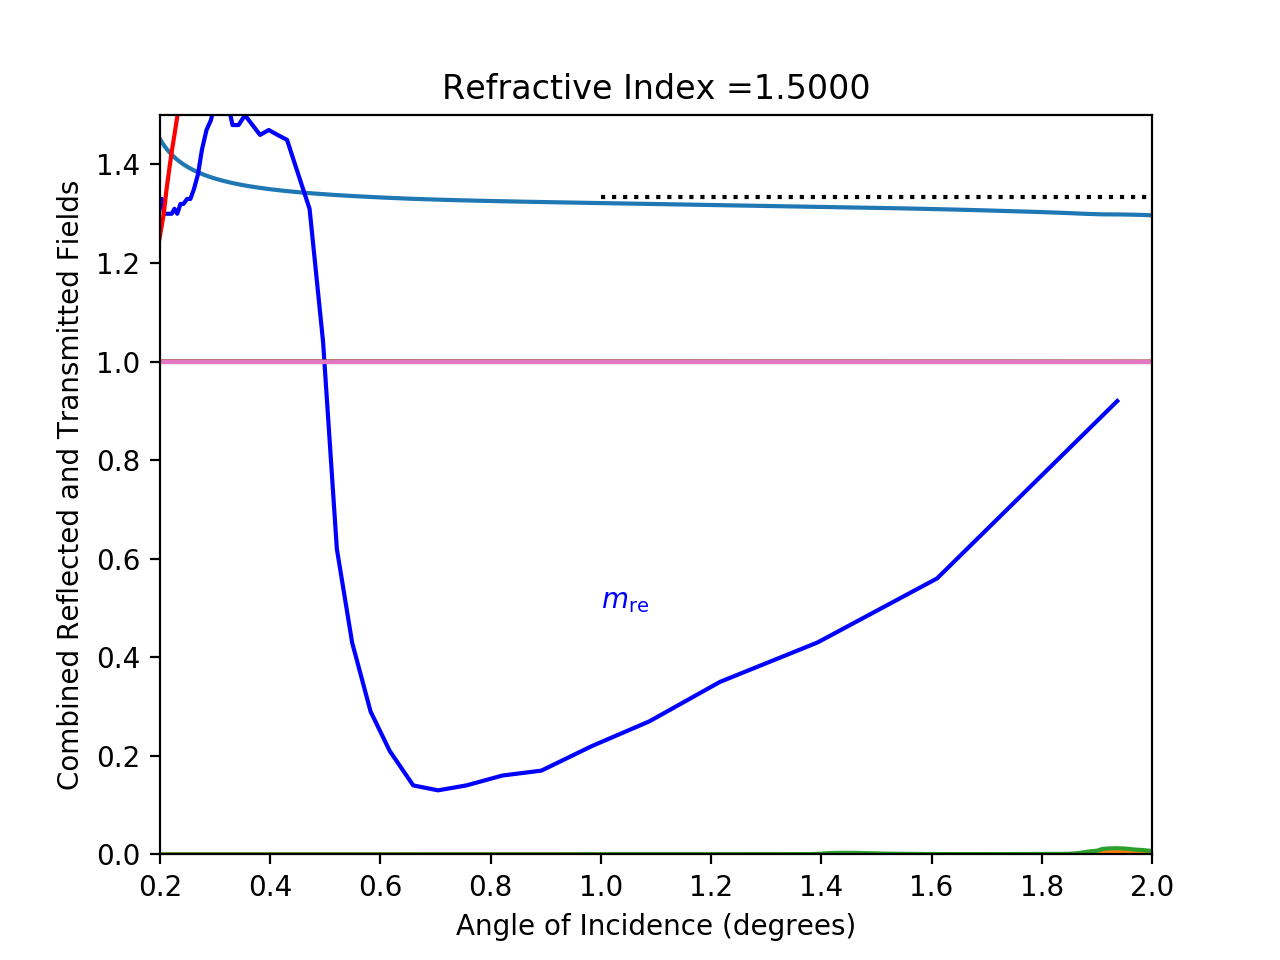

In [2]:
#import the Segelstein data
h2o = np.genfromtxt('http://omlc.org/spectra/water/data/segelstein81_index.txt', delimiter='\t', skip_header=4)
h2o_lam = h2o[:,0]
h2o_mre = h2o[:,1]
h2o_mim = h2o[:,2]

#plot it
plt.plot(h2o_lam,h2o_mre)
plt.plot(h2o_lam,h2o_mim*3)
plt.plot((1,15),(1.333,1.333),':k')
plt.xlim((1,15))
plt.ylim((0,1.8))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(3.4,1.5))
plt.annotate(r'$m_\mathrm{im}\,\,(3\times)$', xy=(3.4,0.5))
plt.annotate(r'$m_\mathrm{re}=1.333$', xy=(10,1.36))

plt.title('Infrared Complex Refractive Index of Water')

plt.show()

In [3]:
mua = 4*np.pi* h2o_mim/h2o_lam

plt.plot(h2o_lam,mua)
plt.xlim((0.3,20))
plt.ylim((0,1.5))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Absorption Coefficient (1/micron)')

plt.title('Water')

plt.show()

<IPython.core.display.Javascript object>


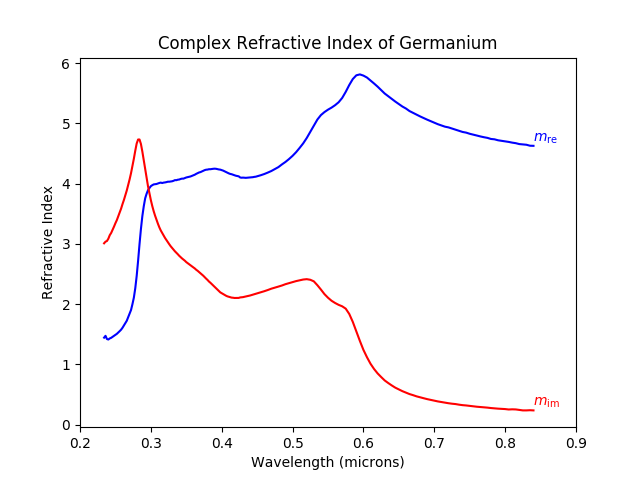

In [4]:
# import the Jellison data for germanium
ge = np.genfromtxt('https://refractiveindex.info/tmp/data/main/Ge/Jellison.txt', delimiter='\t')

# data is stacked so need to rearrange
N = len(ge)//2
ge_lam = ge[1:N,0]
ge_mre = ge[1:N,1]
ge_mim = ge[N+1:,1]

plt.plot(ge_lam,ge_mre,color='blue')
plt.plot(ge_lam,ge_mim,color='red')
plt.xlim((0.2,0.9))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(ge_lam[-1],ge_mre[-1]),va='bottom',color='blue')
plt.annotate(r'$m_\mathrm{im}$', xy=(ge_lam[-1],ge_mim[-1]),va='bottom',color='red')

plt.title('Complex Refractive Index of Germanium')

plt.show()

In [4]:
# import the Johnson and Christy data for gold
au = np.genfromtxt('https://refractiveindex.info/tmp/data/main/Au/Johnson.txt', delimiter='\t')

# data is stacked so need to rearrange
N = len(au)//2
au_lam = au[1:N,0]
au_mre = au[1:N,1]
au_mim = au[N+1:,1]

plt.plot(au_lam,au_mre,color='blue')
plt.plot(au_lam,au_mim,color='red')
plt.xlim((0.2,2))
plt.xlabel('Wavelength (microns)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(1.0,0.5),color='blue')
plt.annotate(r'$m_\mathrm{im}$', xy=(1.0,8),color='red')

plt.title('Complex Refractive Index of Gold')

plt.show()

## Poynting vector and Irradiance

The Poynting vector describes the power flux (the energy per unit area per unit time) of an electromagnetic field,
$$
\mathbf{S} = \mathbf{E} \times \mathbf{H}
$$
The time-averaged Poynting vector is the irradiance (power/area) and can be shown to be
$$
\langle \mathbf{S}\rangle = {n\over 2 Z_0} \mathbf{E}\cdot \mathbf{E}^* =  {n\over 2 Z_0} |\mathbf{E}|^2
$$
where $Z_0=377\,\Omega$ is the impedance of free space. The factor of 2 arises from time averaging, and the index of refraction $n$ describes the medium being propagated through. (Note that $E$ has units of Volts/meter and you know that power is Volt$^2$/Ohm and therefore all the units will work out to Watts/meter$^2$).


## Fresnel Reflectance

When an electric plane wave from a vacuum and hits a flat surface at an angle $\theta$ then the reflected electric field for parallel and perpendicularly polarized light will be
$$
E_p = r_p E_0 \qquad\mbox{and}\qquad E_s = r_s E_0
$$
and the irradiance changes by the squares
$$
{n\over 2 Z_0}|E_p|^2 = {n\over 2 Z_0}|r_p E_0|^2 \qquad\mbox{and}\qquad {n\over 2 Z_0}|E_s|^2 = {n\over 2 Z_0}|r_s E_0|^2
$$
or if we use $I$ for irradiance then
$$
{n\over 2 Z_0}|E_p|^2 = {n\over 2 Z_0}|r_p E_0|^2 \qquad\mbox{and}\qquad {n\over 2 Z_0}|E_s|^2 = {n\over 2 Z_0}|r_s E_0|^2
$$

The Fresnel field reflection coefficients are
$$
r_p=r_\parallel ={m^2\cos\theta-\sqrt{m^2-\sin^2\theta}\over
                        m^2\cos\theta+\sqrt{m^2-\sin^2\theta}},
$$
and
$$
r_s=r_\perp ={\cos\theta-\sqrt{m^2-\sin^2\theta}\over
                    \cos\theta+\sqrt{m^2-\sin^2\theta}}.
$$
The advantage to this particular formulation is that it works for complex indices of refraction and there is no need to calculate the transmitted angle using Snell's law.  A second advantage is that the denominator does not go to zero when $\theta=0$. 

The Fresnel field transmission coefficients are
$$
t_p=t_\parallel ={2m\cos\theta\over
                        m^2\cos\theta+\sqrt{m^2-\sin^2\theta}},
$$
and
$$
t_s=t_\perp ={2\cos\theta\over
                    \cos\theta+\sqrt{m^2-\sin^2\theta}}.
$$

# Comparison to figures in Hecht, *Optics*, 2002

At normal incidence $\theta=0$, 
$$
t_\bot+(-r_\bot)=1
$$
and 
$$
t_\parallel+r_\parallel=1
$$

In [6]:
rp = pypolar.fresnel.r_par(1.5,0)
print('At normal incidence r_p=%.3f'%rp)
tp = pypolar.fresnel.t_par(1.5,0)
print('At normal incidence t_p=%.3f'%tp)
print('tp+rp=%.3f'%(tp+rp))
print()

rs = pypolar.fresnel.r_per(1.5,0)
print('At normal incidence r_s=%.3f'%rs)
ts = pypolar.fresnel.t_per(1.5,0)
print('At normal incidence t_s=%.3f'%ts)
print('ts-rs=%.3f'%(ts-rs))

At normal incidence r_p=0.200
At normal incidence t_p=0.800
tp+rp=1.000

At normal incidence r_s=-0.200
At normal incidence t_s=0.800
ts-rs=1.000


If m is real, then 
$$
t_\bot(\theta)-r_\bot(\theta)=1
$$
but except for $\theta=0$
$$
t_\parallel(\theta)+r_\parallel(\theta)\ne1
$$

<IPython.core.display.Javascript object>


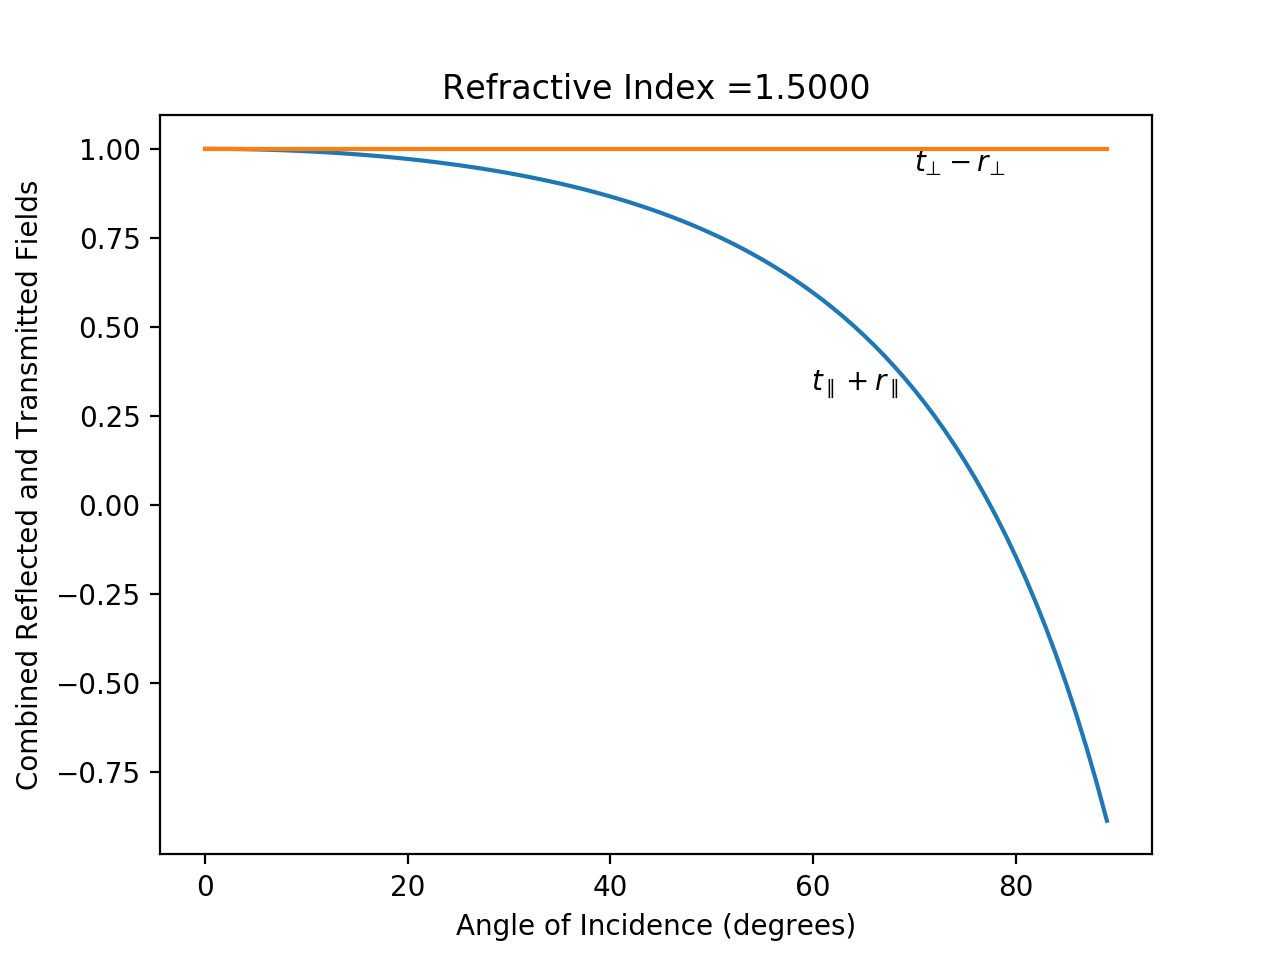

In [9]:
m=1.5
theta = np.linspace(0,89,90)
th = np.radians(theta)
rs = pypolar.fresnel.r_per(m,th)
rp = pypolar.fresnel.r_par(m,th)
ts = pypolar.fresnel.t_per(m,th)
tp = pypolar.fresnel.t_par(m,th)

plt.plot(theta,tp+rp)
plt.plot(theta,ts-rs)

plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Combined Reflected and Transmitted Fields")
plt.annotate(r'$t_\bot-r_\bot$',  xy=(theta[70], ts[70]-rs[70]),va='top')
plt.annotate(r'$t_\parallel+r_\parallel$  ',  xy=(theta[70], tp[70]+rp[70]),ha='right')
plt.title('Refractive Index =%.4f'%m)
plt.show()

## Testing the field reflection and transmission coefficients

<IPython.core.display.Javascript object>


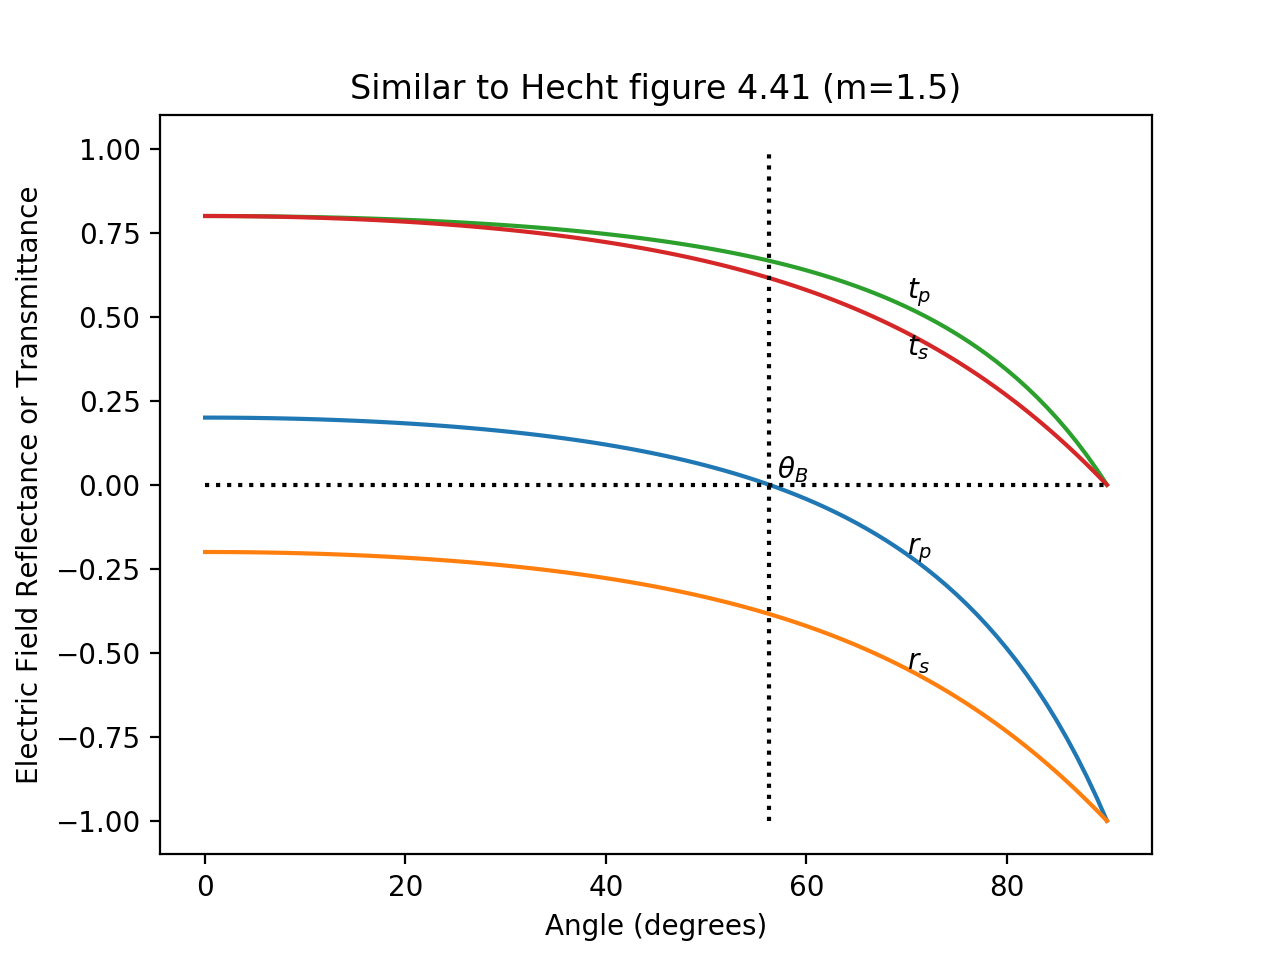

In [11]:
# This plot is identical to that in Hecht 4.41 in the 2002 edition
m = 1.5

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)

rp = pypolar.fresnel.r_par(m,th)
rs = pypolar.fresnel.r_per(m,th)
tp = pypolar.fresnel.t_par(m,th)
ts = pypolar.fresnel.t_per(m,th)

brewster = np.degrees(np.arctan(m))

plt.plot(theta,rp)
plt.plot(theta,rs)
plt.plot(theta,tp)
plt.plot(theta,ts)
plt.plot([0,90],[0,0],':k')
plt.plot([brewster,brewster],[-1,1],':k')
plt.xlabel("Angle (degrees)")
plt.ylabel("Electric Field Reflectance or Transmittance")
plt.annotate(r'$r_s$',  xy=(theta[70], rs[70]))
plt.annotate(r'$r_p$',  xy=(theta[70], rp[70]))
plt.annotate(r'$t_s$',  xy=(theta[70], 0.85*ts[70]))
plt.annotate(r'$t_p$',  xy=(theta[70], 1.05*tp[70]))
plt.annotate(r' $\theta_B$',  xy=(brewster, 0), va='bottom')


plt.title("Similar to Hecht figure 4.41 (m=1.5)")

plt.show()

<IPython.core.display.Javascript object>


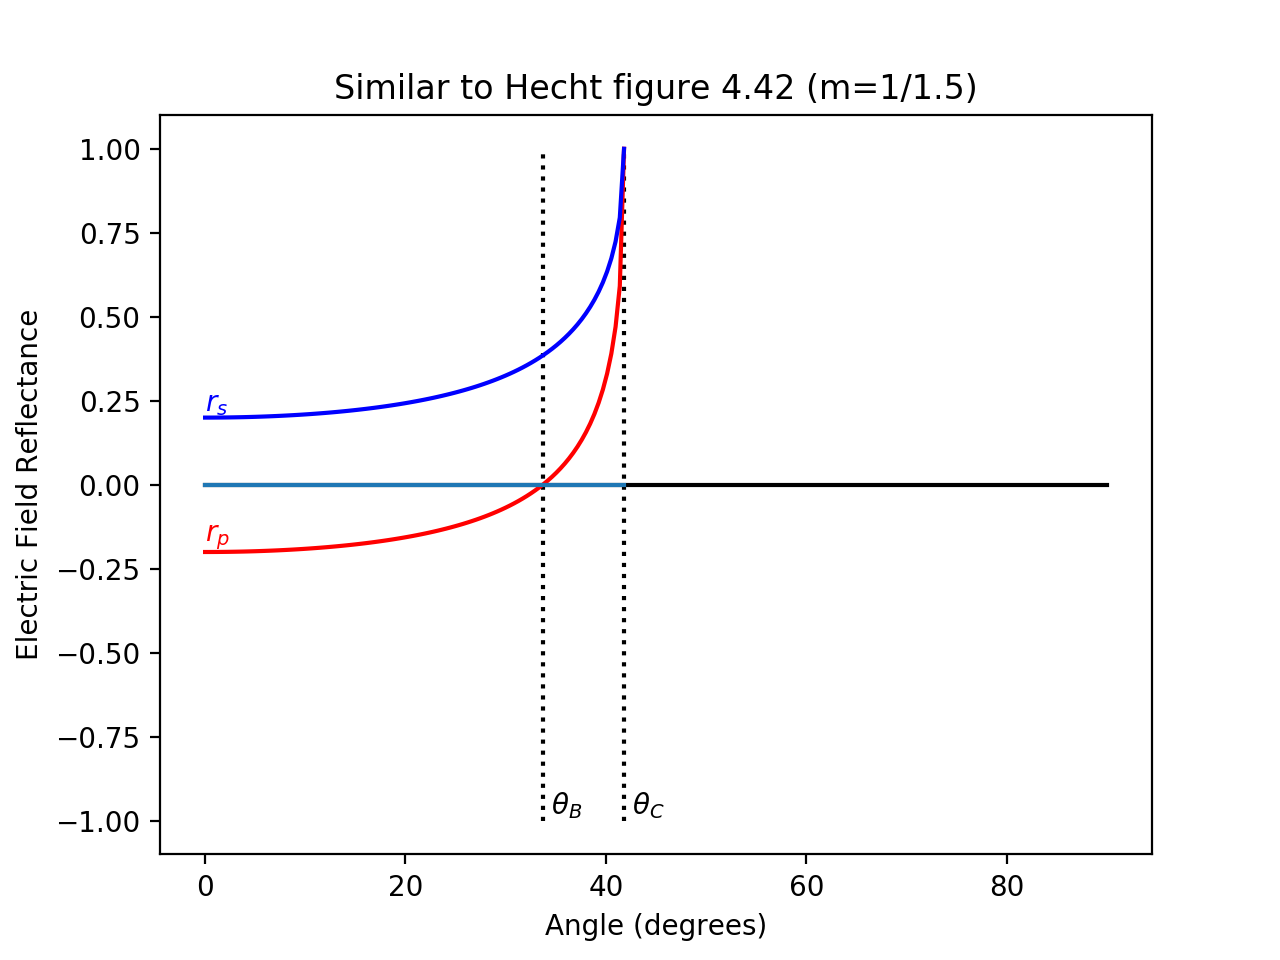

In [13]:
m = 1/1.5

brewster = np.degrees(np.arctan(m))
plt.plot([brewster,brewster],[-1,1],':k')
plt.annotate(r' $\theta_B$',  xy=(brewster, -1), va='bottom')

critical = np.degrees(np.arcsin(m))
plt.plot([critical,critical],[-1,1],':k')
plt.annotate(r' $\theta_C$',  xy=(critical, -1), va='bottom')

plt.plot([0,90],[0,0],'k')

N=100
theta = np.linspace(0,critical,N)

rp = pypolar.fresnel.r_par(m, np.radians(theta))
rs = pypolar.fresnel.r_per(m, np.radians(theta))

plt.plot(theta,rp.real, color='red')
plt.plot(theta,rs.real, color='blue')
plt.plot(theta,rp.imag)

plt.xlabel("Angle (degrees)")
plt.ylabel("Electric Field Reflectance")
plt.annotate(r'$r_s$',  xy=(theta[0], rs[0]), va='bottom', color='blue')
plt.annotate(r'$r_p$',  xy=(theta[0], rp[0]), va='bottom', color='red')

plt.title("Similar to Hecht figure 4.42 (m=1/1.5)")

plt.show()

## Testing the phase shift 

This was tricky, because python was chosing the wrong branch of the sqrt() function.  But once that was realized, the graphs match up nicely.


<IPython.core.display.Javascript object>


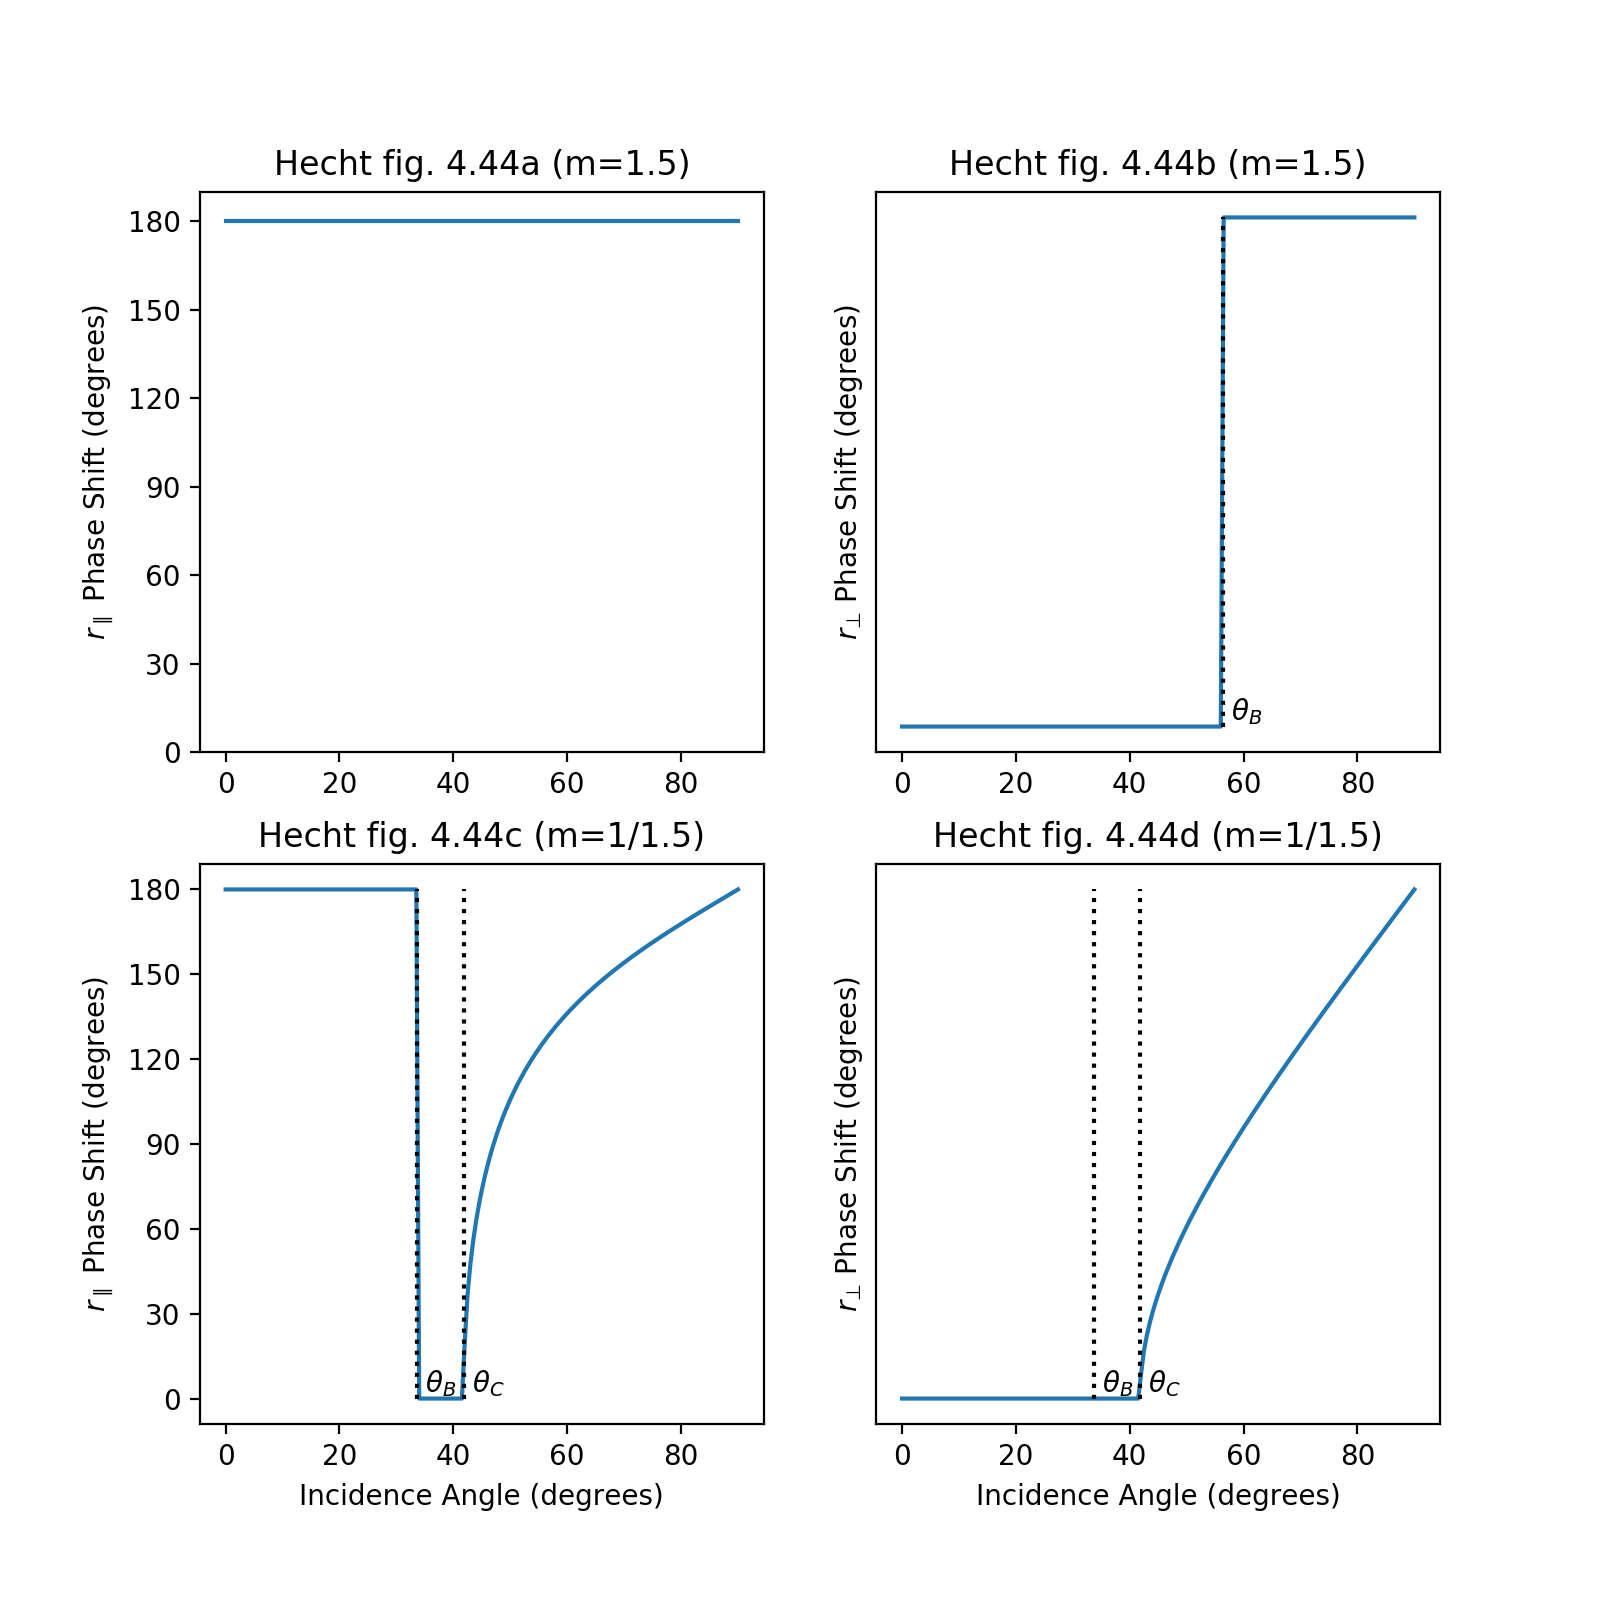

In [19]:
N=181
theta = np.linspace(0,90,N)

m = 1.5

rp = pypolar.fresnel.r_par(m,np.radians(theta))
rs = pypolar.fresnel.r_per(m,np.radians(theta))

plt.subplots(2,2,figsize=(8,8))

plt.subplot(2,2,1)
plt.plot(theta,np.degrees(np.angle(rs)))

#plt.xlabel("Incidence Angle (degrees)")
plt.ylabel(r"$r_\parallel$ Phase Shift (degrees)")
plt.yticks([0,30,60,90,120,150,180])
plt.title("Hecht fig. 4.44a (m=1.5)")
plt.show()

plt.subplot(2,2,2)
plt.plot(theta,np.degrees(np.angle(rp)))
#plt.xlabel("Incidence Angle (degrees)")
plt.ylabel(r"$r_\bot$ Phase Shift (degrees)")
#plt.yticks([0,30,60,90,120,150,180])
plt.yticks([])
plt.title("Hecht fig. 4.44b (m=1.5)")
brewster = np.degrees(np.arctan(m))
plt.plot([brewster,brewster],[-0,180],':k')
plt.annotate(r' $\theta_B$',  xy=(brewster, -0), va='bottom')

m = 1/1.5

rs = pypolar.fresnel.r_per(m,theta*np.pi/180.0)
rp = pypolar.fresnel.r_par(m,theta*np.pi/180.0)

brewster = np.degrees(np.arctan(m))
critical = np.degrees(np.arcsin(m))

plt.subplot(2,2,3)
plt.plot(theta, np.degrees(np.angle(rp)))
plt.xlabel("Incidence Angle (degrees)")
plt.ylabel(r"$r_\parallel$ Phase Shift (degrees)")
plt.yticks([0,30,60,90,120,150,180])
plt.title("Hecht fig. 4.44c (m=1/1.5)")
plt.plot([brewster,brewster],[-0,180],':k')
plt.annotate(r' $\theta_B$',  xy=(brewster, -0), va='bottom')
plt.plot([critical,critical],[-0,180],':k')
plt.annotate(r' $\theta_C$',  xy=(critical, -0), va='bottom')


plt.subplot(2,2,4)
plt.plot(theta, np.degrees(np.angle(rs)))

plt.xlabel("Incidence Angle (degrees)")
plt.ylabel(r"$r_\bot$ Phase Shift (degrees)")
#plt.yticks([0,30,60,90,120,150,180])
plt.yticks([])
plt.title("Hecht fig. 4.44d (m=1/1.5)")
plt.plot([brewster,brewster],[-0,180],':k')
plt.annotate(r' $\theta_B$',  xy=(brewster, -0), va='bottom')
plt.plot([critical,critical],[-0,180],':k')
plt.annotate(r' $\theta_C$',  xy=(critical, -0), va='bottom')
plt.show()

# Reflection and Transmission of Irradiance

The change in the irradiance will be given by
$$
R_p=R_\parallel =\left|{m^2\cos\theta-\sqrt{m^2-\sin^2\theta}\over
                        m^2\cos\theta+\sqrt{m^2-\sin^2\theta}}\right|^2,
$$
and
$$
R_s=R_\perp =\left|{\cos\theta-\sqrt{m^2-\sin^2\theta}\over
                    \cos\theta+\sqrt{m^2-\sin^2\theta}}\right|^2.
$$

The irradiance reflectance and transmittance are then
$$
R_p = |r_p|^2\quad\mbox{and}\quad R_s = |r_s|^2
$$
and the transmission is
$$
T_p = {\sqrt{m^2-\sin^2\theta} \over \sin\theta}|t_p|^2\quad\mbox{and}\quad 
T_s = {\sqrt{m^2-\sin^2\theta} \over \sin\theta}|t_s|^2
$$

In [17]:
Rp = pypolar.fresnel.R_par(1.5,0)
print('At normal incidence R_p=%.3f'%Rp)
Rs = pypolar.fresnel.R_per(1.5,0)
print('At normal incidence R_s=%.3f'%Rs)

print()

Tp = pypolar.fresnel.T_par(1.5,0)
print('At normal incidence T_p=%.3f'%Tp)
Ts = pypolar.fresnel.T_per(1.5,0)
print('At normal incidence T_s=%.3f'%Ts)

At normal incidence R_p=0.040
At normal incidence R_s=0.040

At normal incidence T_p=0.960
At normal incidence T_s=0.960


<IPython.core.display.Javascript object>


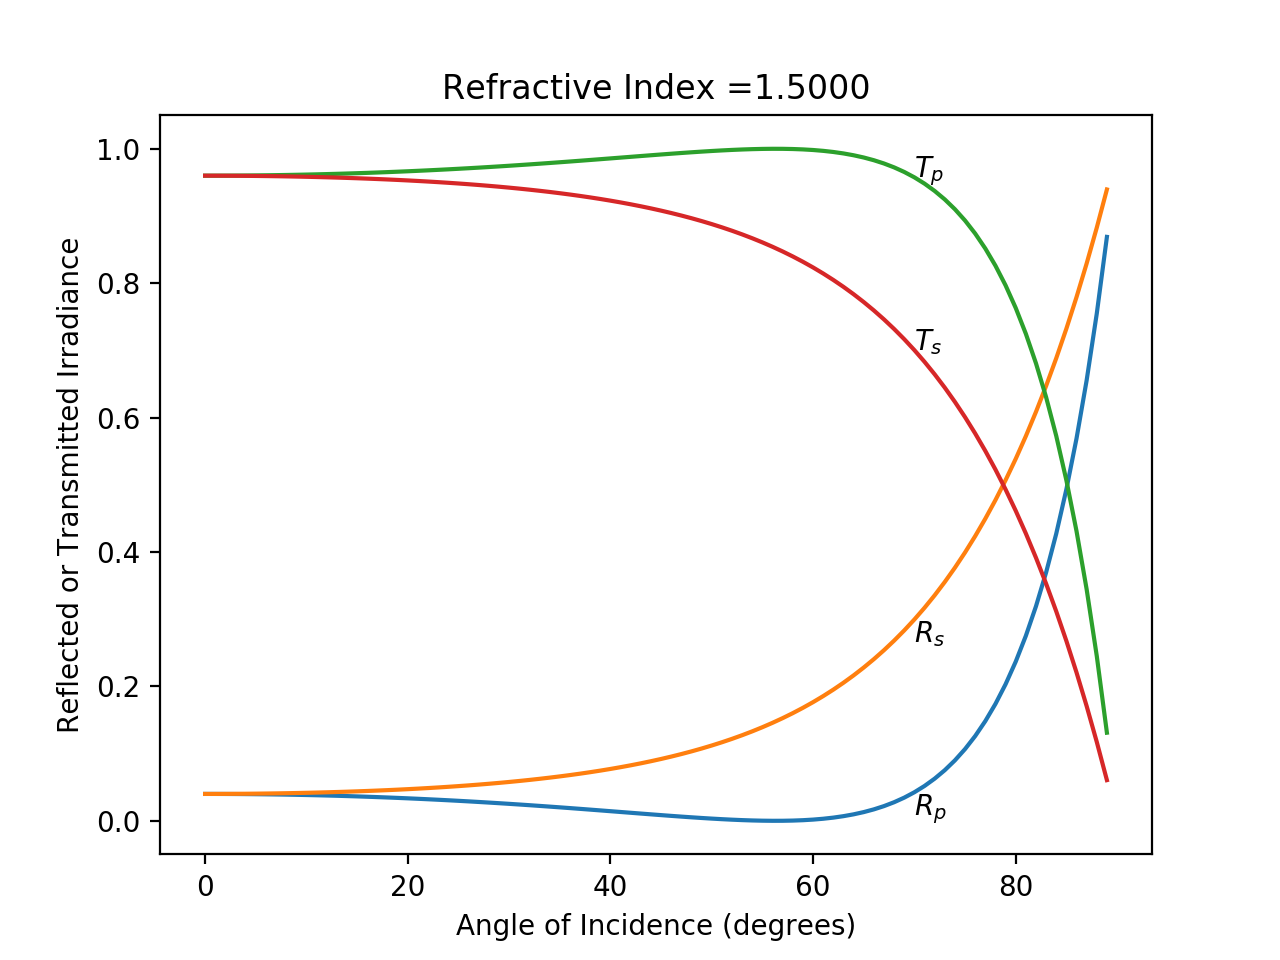

In [18]:
m=1.5
theta = np.linspace(0,89,90)
th = np.radians(theta)
Rs = pypolar.fresnel.R_per(m,th)
Rp = pypolar.fresnel.R_par(m,th)
Ts = pypolar.fresnel.T_per(m,th)
Tp = pypolar.fresnel.T_par(m,th)

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.plot(theta,Tp)
plt.plot(theta,Ts)

plt.xlabel("Angle of Incidence (degrees)")
plt.ylabel("Reflected or Transmitted Irradiance")
plt.annotate(r'$R_s$',  xy=(theta[70], Rs[70]),va='top')
plt.annotate(r'$R_p$',  xy=(theta[70], Rp[70]),va='top')
plt.annotate(r'$T_s$',  xy=(theta[70], Ts[70]))
plt.annotate(r'$T_p$',  xy=(theta[70], Tp[70]))
plt.title('Refractive Index =%.4f'%m)

plt.show()

## Dielectrics

For dielectrics like glass, $\kappa=0$ and the reflectance as a function of angle looks like
The angle at which $R_p$ goes is a minimum in dielectrics is called *Brewster's angle* $\theta_B$.  For semiconductors and metals this angle is called the *principal angle of incidence*.

<IPython.core.display.Javascript object>


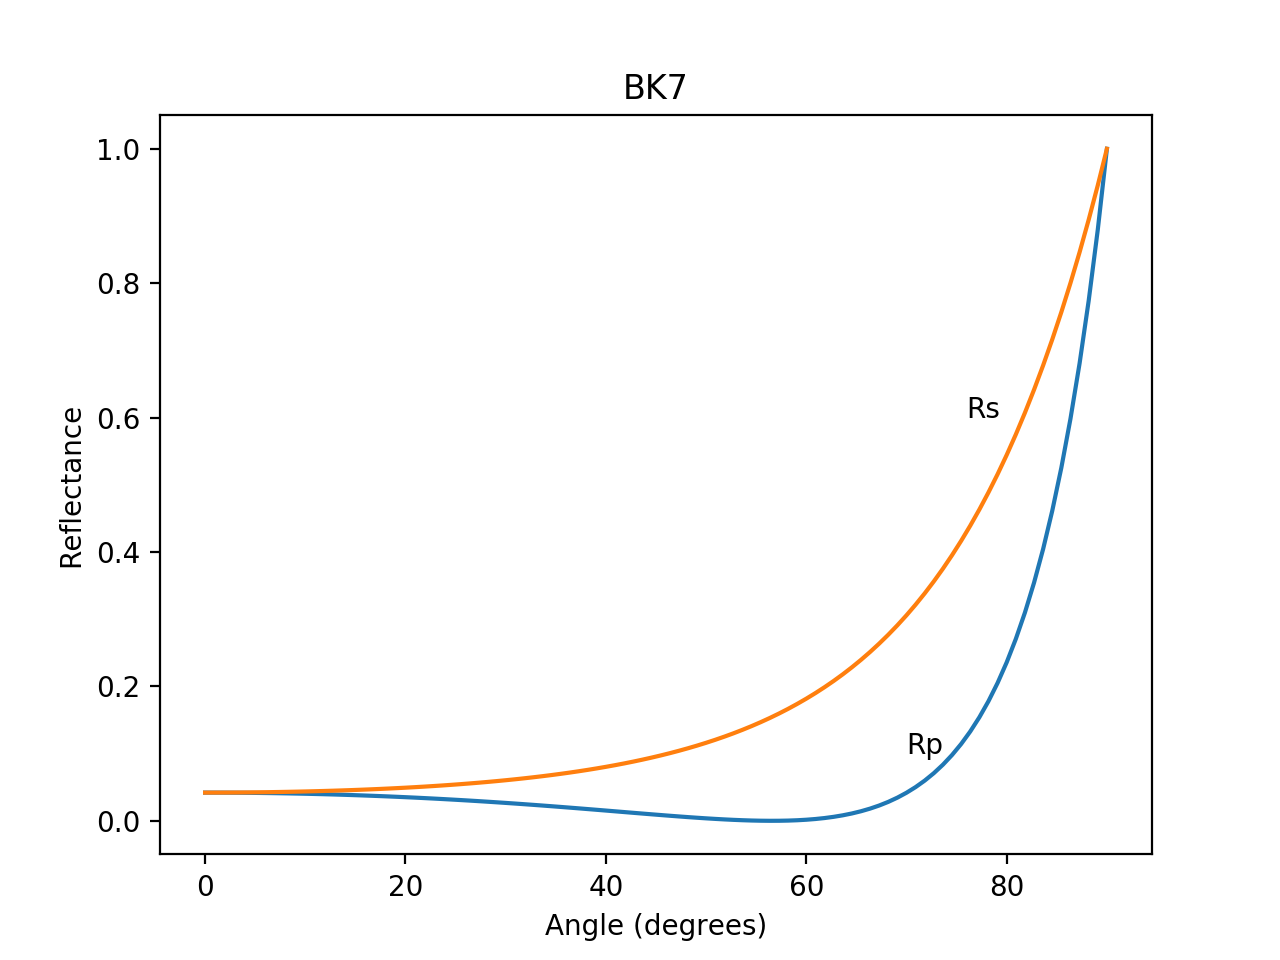

In [20]:
# BK7
m = complex(1.51508, 0.0)

N=100
theta = np.linspace(0,90,N)

Rp = pypolar.fresnel.R_par(m, np.radians(theta))
Rs = pypolar.fresnel.R_per(m, np.radians(theta))

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.annotate('Rs',  xy=(76, 0.6))
plt.annotate('Rp',  xy=(70, 0.1))
plt.title("BK7")

plt.show()

## Semiconductors

For semi-conductors like germanium ($m=5.47392- j 0.771829$ at $\lambda$=633nm) the reflectance as a function of angle looks like 

<IPython.core.display.Javascript object>


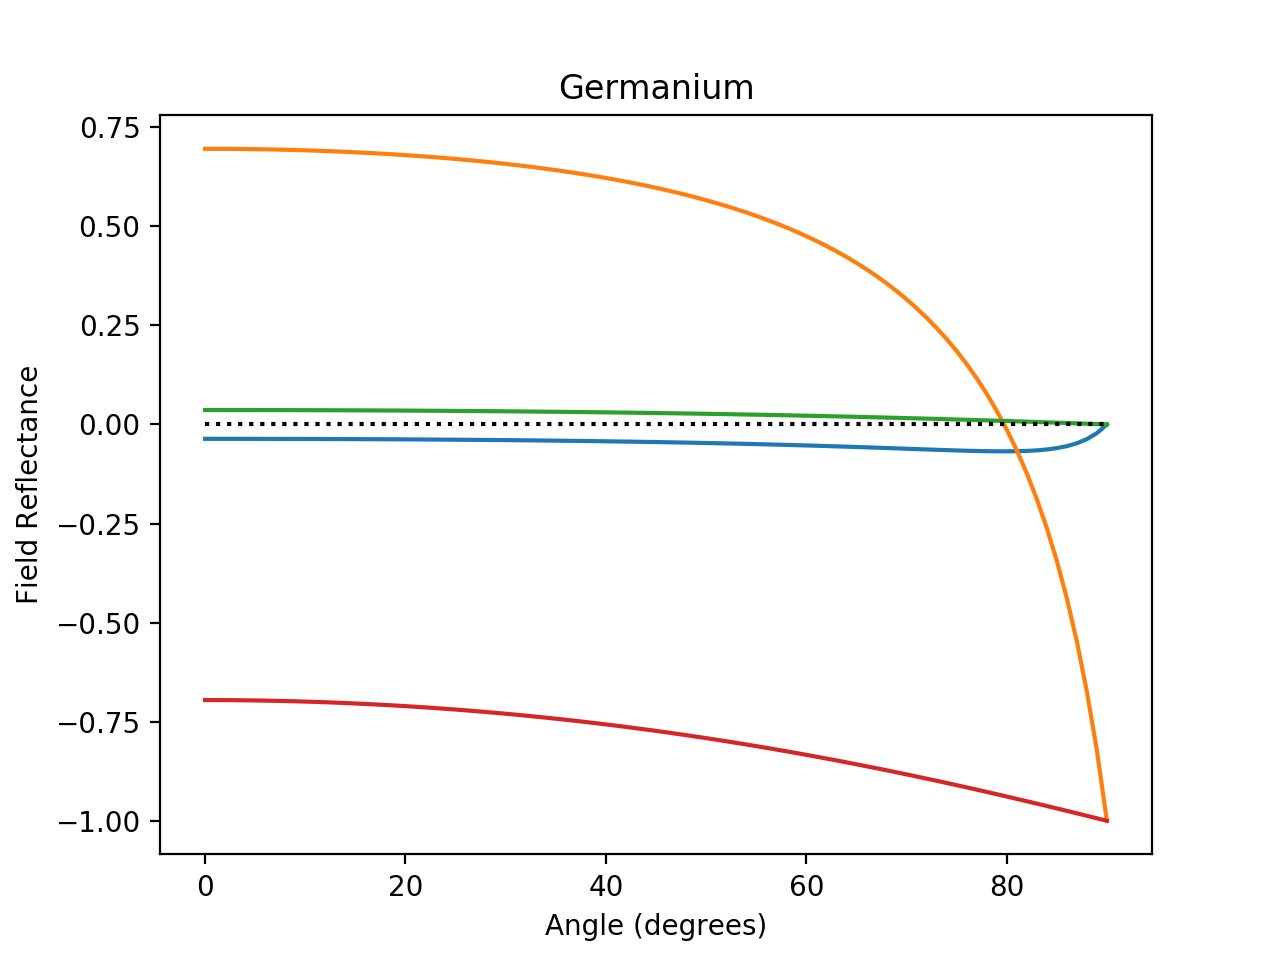

In [21]:
# Germanium
m = complex(5.47392, -0.771829)

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)
rp = pypolar.fresnel.r_par(m,th)
rs = pypolar.fresnel.r_per(m,th)

plt.plot(theta,rp.imag)
plt.plot(theta,rp.real)
plt.plot(theta,rs.imag)
plt.plot(theta,rs.real)
plt.plot([0,90],[0,0],':k')
plt.xlabel("Angle (degrees)")
plt.ylabel("Field Reflectance")
#plt.annotate('Rs',  xy=(76, 0.8))
#plt.annotate('Rp',  xy=(70, 0.13))
plt.title("Germanium")

plt.show()

## Metals

For metals like gold the index of refraction is $m=0.176717 - j 3.03779$ at $\lambda$=633nm. 
Note that the minimum in $R_p$ is much larger than zero and is called the *principal polarization angle*.

<IPython.core.display.Javascript object>


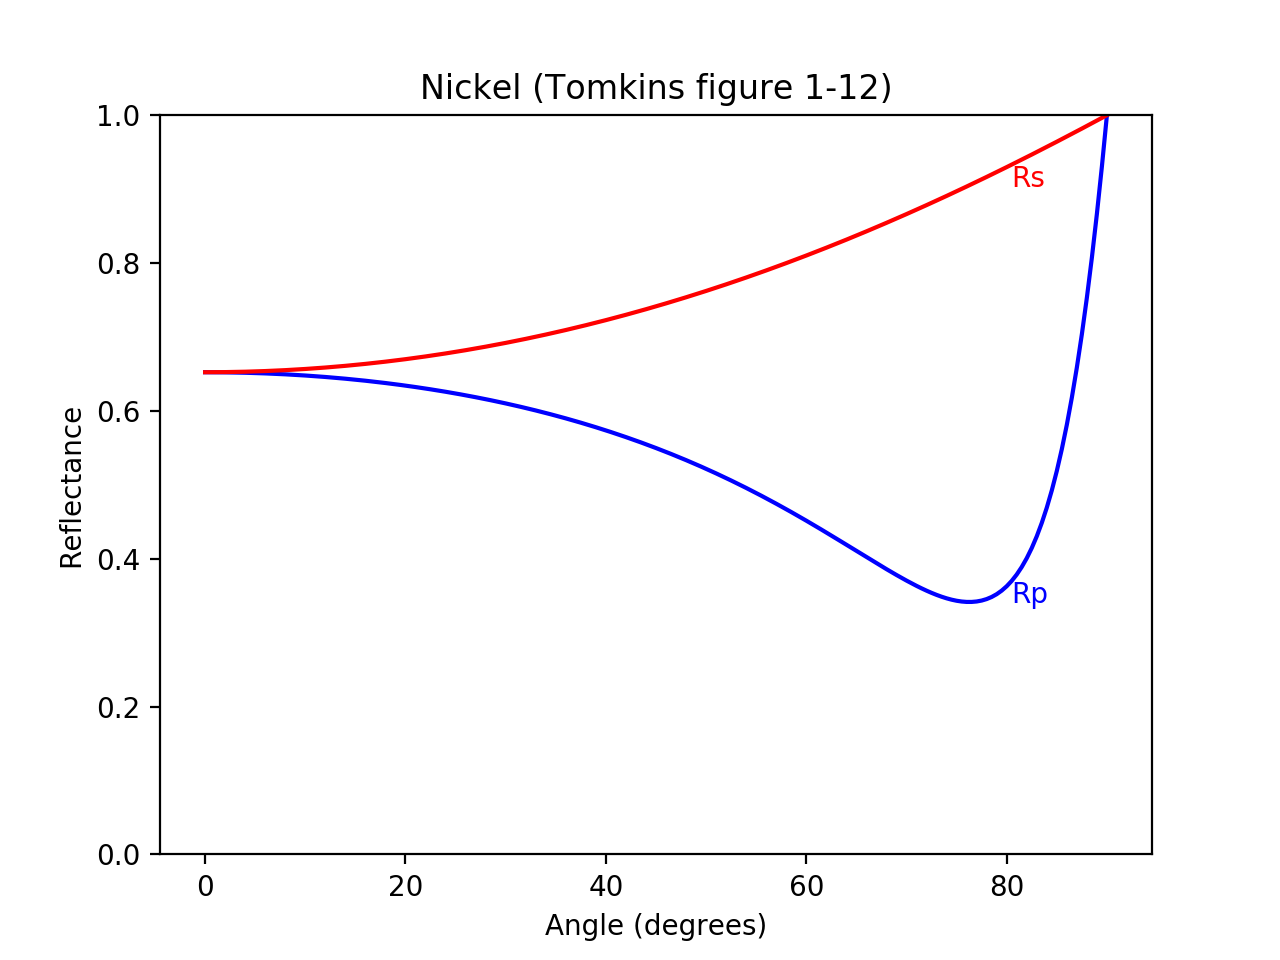

In [22]:
# Nickel
m = complex(2.01, -3.75)

N=181
theta = np.linspace(0,90,N)

th = np.radians(theta)
Rp = pypolar.fresnel.R_par(m,th)
Rs = pypolar.fresnel.R_per(m,th)

plt.plot(theta,Rp,color='blue')
plt.plot(theta,Rs,color='red')
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.annotate('Rs',  xy=(theta[-20], Rs[-20]),color='red',va='top')
plt.annotate('Rp',  xy=(theta[-20], Rp[-20]),color='blue',va='top')
plt.title("Nickel (Tomkins figure 1-12)")
plt.ylim(0,1)

plt.show()

<IPython.core.display.Javascript object>


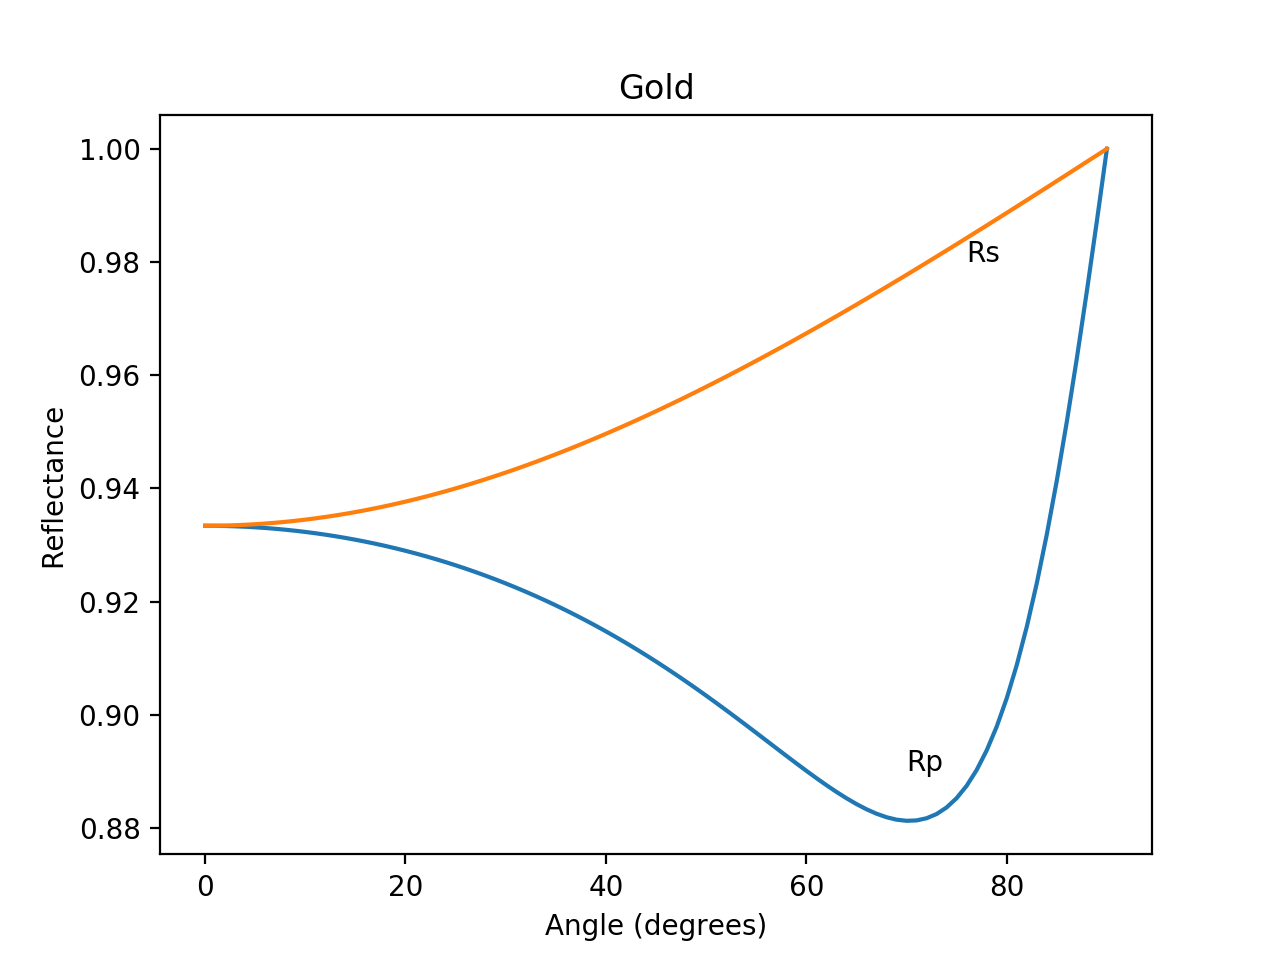

In [23]:
# Gold
m = complex(0.176717, -3.03779)

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)

Rp = pypolar.fresnel.R_par(m,th)
Rs = pypolar.fresnel.R_per(m,th)

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.title("Gold")
plt.annotate('Rs',  xy=(76, 0.98))
plt.annotate('Rp',  xy=(70, 0.89))

plt.show()

## $\tan\psi$

One important parameter used in ellipsometry is the ratio of the parallel and perpendicular reflected light.
This is commonly expressed as $\tan\psi$ is defined as
$$
\tan\psi = {R_p/R_s}
$$

This non-dimensional parameter allows simple measurements of surfaces that give information about things like

* Film thickness
* Refractive Index ($n$) 
* Extinction Coefficient ($\kappa$) 
* Surface Roughness Anisotropy
* Retardation
* Phase Difference 
* Birefringence

<IPython.core.display.Javascript object>


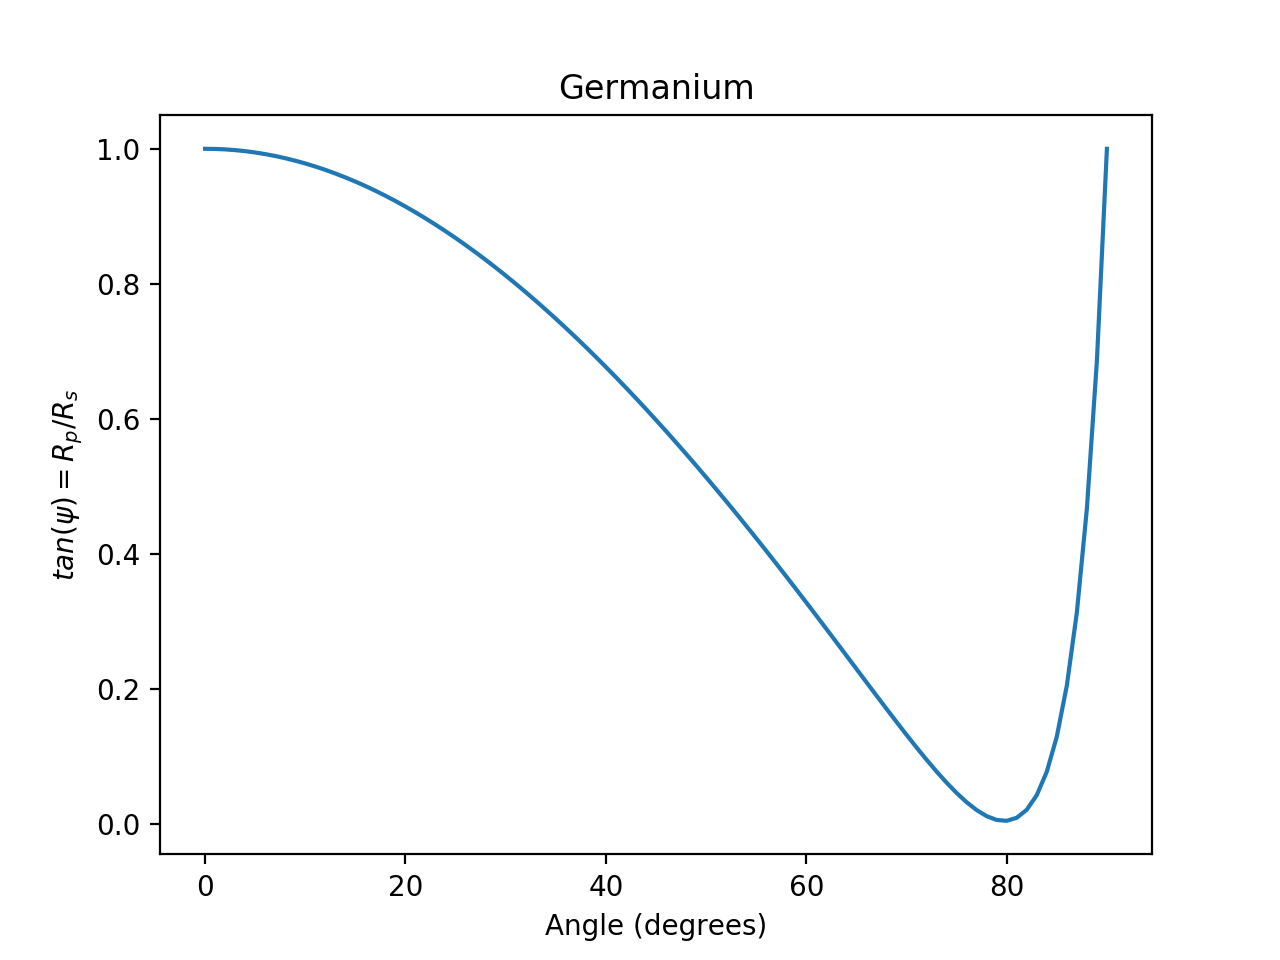

In [24]:
# Germanium
m = complex(5.47392, -0.771829)

N=91
theta = np.linspace(0,90,N)
th = np.radians(theta)
tanpsi = pypolar.fresnel.R_par(m,th)/pypolar.fresnel.R_per(m,th)

plt.plot(theta,tanpsi)
plt.xlabel("Angle (degrees)")
plt.ylabel("$tan(\psi)=R_p/R_s$")
plt.title("Germanium")

plt.show()

## Behavior at 45°

Finally at 45$^\circ$ the square of the perpendicular reflectance equals the parallel reflectance
$$
R_s^2 = R_p
$$

<IPython.core.display.Javascript object>


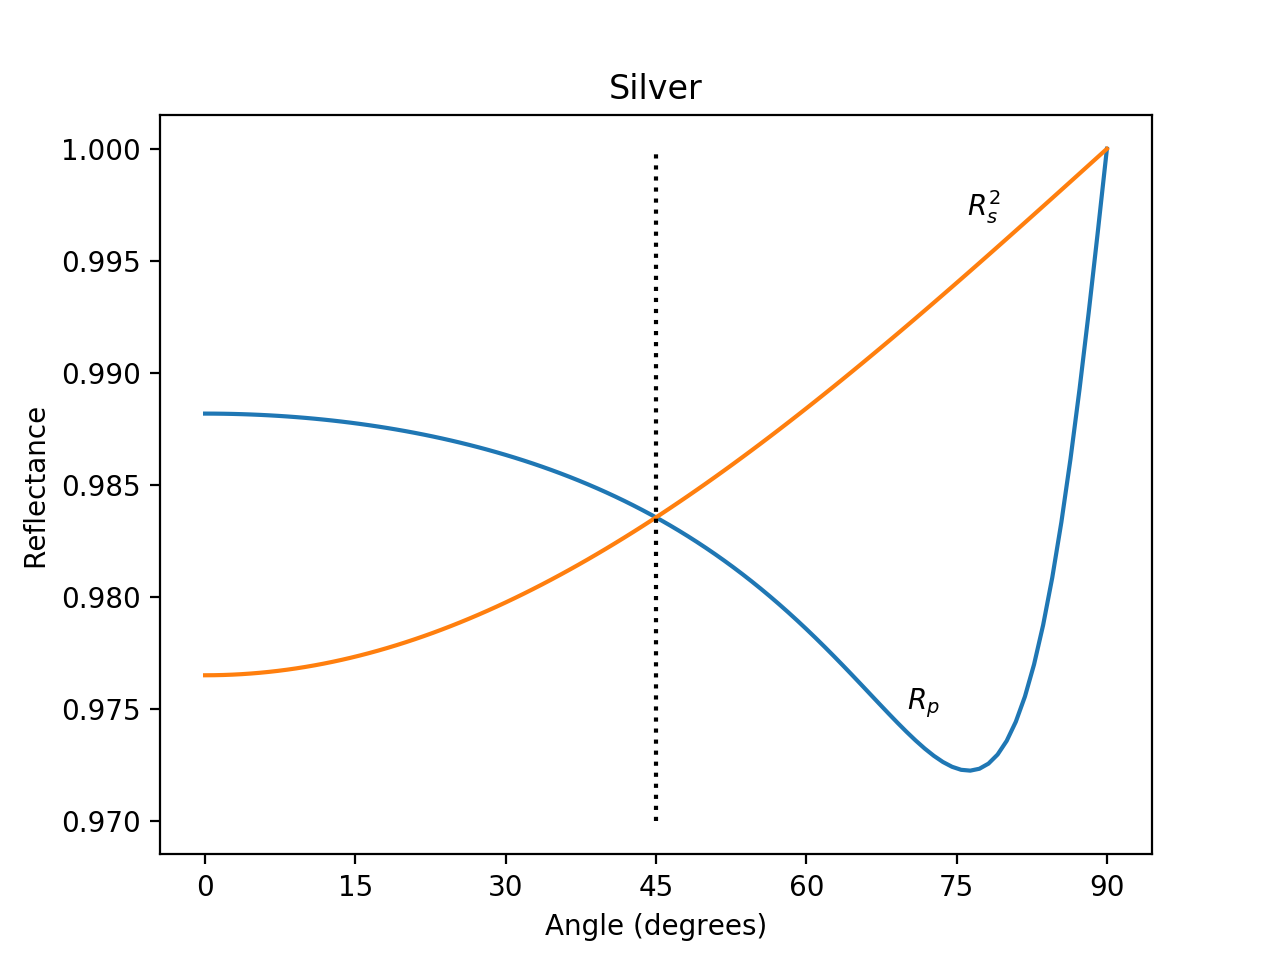

In [25]:
# Silver
m = complex(0.0574411, -4.27996)

N=100
theta = np.linspace(0,90,N)
th = np.radians(theta)
Rp = pypolar.fresnel.R_par(m,th)
Rs = pypolar.fresnel.R_per(m,th)**2

plt.plot(theta,Rp)
plt.plot(theta,Rs)
plt.plot([45,45],[0.97,1.00],':k')
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel("Angle (degrees)")
plt.ylabel("Reflectance")
plt.title("Silver")
plt.annotate('$R_s^2$',  xy=(76, 0.997))
plt.annotate('$R_p$',  xy=(70, 0.975))

plt.show()